# Stock Market Capstone Project


This is the capstone project for the course  [Python for DataScience and Machine Learning](https://www.udemy.com/course/python-for-data-science-and-machine-learning-bootcamp/)
In this data project I will focus on exploratory data analysis of stock prices. The data are obtained directly from yahoo.com.

Here, I focus on the bank stocks during the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016. 

1. I read data from yahoo.com by pandas.datareader 
2. Data are for stock prices of the following bank during 2006 - 2016
    * Bank of America
    * CitiGroup
    * Goldman Sachs
    * JPMorgan Chase
    * Morgan Stanley
    * Wells Fargo
3. All data are concatenated in a multi-index data frame. 
4. I calculated the return of each stock per day and compared the stocks: while all stocks do not show a huge change day-to-day, **Morgan Stanley demonstrates the best return.** Also, **Bank of America and Morgan Stanley demonstrate the most variation in the price.**
5. I then provide **interactive plots** for the price using the iplot and demonstrate the **candle plot and SMA plot**
6. Also, I obtained the correlation between the stock prices. **It turns out that the Bank of America, CitiGroup, and Morgan Stacnley prices have large correlation with each other. **

In [338]:
from pandas_datareader import data, wb
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import datetime
sns.set_style('whitegrid')
# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

%matplotlib inline

In [3]:
BAC = data.DataReader("BAC", 'yahoo', 2006, 2016)

In [4]:
C = data.DataReader("C", 'yahoo', 2006, 2016)

In [5]:
GS =  data.DataReader("GS", 'yahoo', 2006, 2016)

In [6]:
JPM = data.DataReader("JPM", 'yahoo', 2006, 2016)

In [7]:
MS = data.DataReader("MS", 'yahoo', 2006, 2016)

In [8]:
WFC = data.DataReader("WFC", 'yahoo', 2006, 2016)

In [11]:
tickers = "BAC GS C JPM MS WFC".split(' ')

In [12]:
tickers.sort()

In [14]:
bank_stocks=pd.concat([BAC,C, GS, JPM, MS, WFC],axis = 1,keys = tickers)
bank_stocks.columns

MultiIndex([('BAC',      'High'),
            ('BAC',       'Low'),
            ('BAC',      'Open'),
            ('BAC',     'Close'),
            ('BAC',    'Volume'),
            ('BAC', 'Adj Close'),
            (  'C',      'High'),
            (  'C',       'Low'),
            (  'C',      'Open'),
            (  'C',     'Close'),
            (  'C',    'Volume'),
            (  'C', 'Adj Close'),
            ( 'GS',      'High'),
            ( 'GS',       'Low'),
            ( 'GS',      'Open'),
            ( 'GS',     'Close'),
            ( 'GS',    'Volume'),
            ( 'GS', 'Adj Close'),
            ('JPM',      'High'),
            ('JPM',       'Low'),
            ('JPM',      'Open'),
            ('JPM',     'Close'),
            ('JPM',    'Volume'),
            ('JPM', 'Adj Close'),
            ( 'MS',      'High'),
            ( 'MS',       'Low'),
            ( 'MS',      'Open'),
            ( 'MS',     'Close'),
            ( 'MS',    'Volume'),
            ( 

In [144]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']
bank_stocks ['BAC'] 

Stock Info,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,47.180000,46.150002,46.919998,47.080002,16296700.0,34.106033
2006-01-04,47.240002,46.450001,47.000000,46.580002,17757900.0,33.743832
2006-01-05,46.830002,46.320000,46.580002,46.639999,14970700.0,33.787285
2006-01-06,46.910000,46.349998,46.799999,46.570000,12599800.0,33.736572
2006-01-09,46.970001,46.360001,46.720001,46.599998,15619400.0,33.758301
...,...,...,...,...,...,...
2015-12-24,17.379999,17.219999,17.320000,17.270000,29369400.0,15.430057
2015-12-28,17.230000,16.980000,17.219999,17.129999,41777500.0,15.304972
2015-12-29,17.350000,17.160000,17.250000,17.280001,45670400.0,15.438996


Text(0, 0.5, '$')

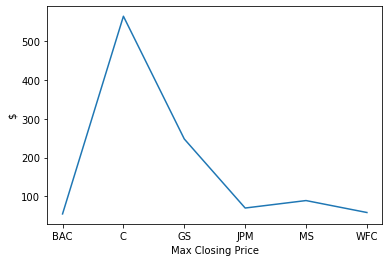

In [147]:
A1 = bank_stocks.xs(key = 'Close', level = 'Stock Info', axis = 1).max().plot()
A1. set_xlabel('Max Closing Price')
A1. set_ylabel('$')

In [257]:
returns = pd.DataFrame(data = np.random.randn(2517,6), columns= tickers)
bank_stocks.xs(key = 'Close', level = 'Stock Info', axis = 1)['BAC'].iloc[0]
for j in tickers:
    T= bank_stocks.xs(key = 'Close', level = 'Stock Info', axis = 1)[j]
    returns[j].iloc[0] = 0
    for i in range(1, len(T)):
        returns[j].iloc[i] = (T.iloc[i]/T.iloc[i-1]-1)
        
# OR we could also use pct_change
returns = pd.DataFrame()
for j in tickers:
    returns [j] = bank_stocks[j]['Close'].pct_change()

In [258]:
returns.iloc[0,:] = 0
returns

,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2006-01-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158
...,...,...,...,...,...,...
2015-12-24,-0.004037,0.001520,-0.002624,-0.001948,-0.003681,-0.003997
2015-12-28,-0.008107,-0.006261,-0.004658,-0.003303,-0.009544,-0.002554
2015-12-29,0.008757,0.011455,0.010516,0.010395,0.011812,0.011156


In [259]:
returns

,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2006-01-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158
...,...,...,...,...,...,...
2015-12-24,-0.004037,0.001520,-0.002624,-0.001948,-0.003681,-0.003997
2015-12-28,-0.008107,-0.006261,-0.004658,-0.003303,-0.009544,-0.002554
2015-12-29,0.008757,0.011455,0.010516,0.010395,0.011812,0.011156


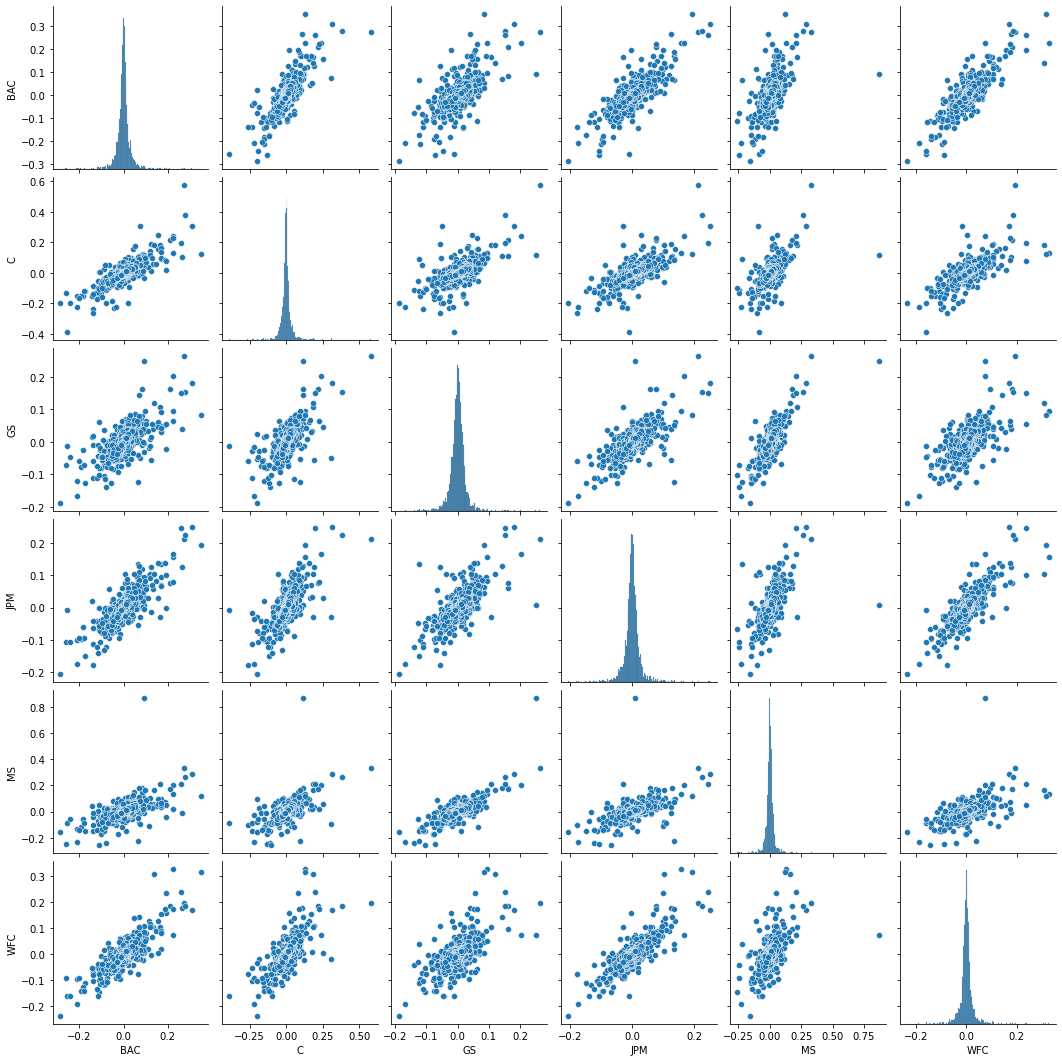

In [251]:
sns.pairplot(returns)

In [260]:
returns

,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2006-01-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158
...,...,...,...,...,...,...
2015-12-24,-0.004037,0.001520,-0.002624,-0.001948,-0.003681,-0.003997
2015-12-28,-0.008107,-0.006261,-0.004658,-0.003303,-0.009544,-0.002554
2015-12-29,0.008757,0.011455,0.010516,0.010395,0.011812,0.011156


In [291]:
returns.idxmin()

BAC   2009-01-20
C     2009-02-27
GS    2009-01-20
JPM   2009-01-20
MS    2008-10-09
WFC   2009-01-20
dtype: datetime64[ns]

In [292]:
returns.idxmax()

BAC   2009-04-09
C     2008-11-24
GS    2008-11-24
JPM   2009-01-21
MS    2008-10-13
WFC   2008-07-16
dtype: datetime64[ns]

In [293]:
returns.std()

BAC    0.036640
C      0.038664
GS     0.025385
JPM    0.027662
MS     0.037812
WFC    0.030232
dtype: float64

In [303]:
returns.loc['2015-01-01':'2015-12-31'].std()

BAC    0.016163
C      0.015289
GS     0.014046
JPM    0.014017
MS     0.016249
WFC    0.012591
dtype: float64

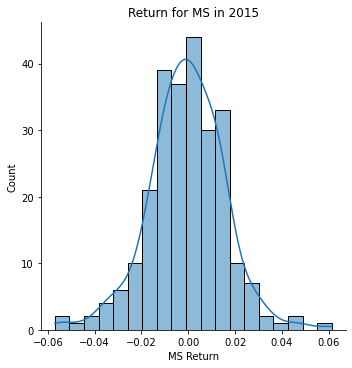

In [335]:
A2 = sns.displot(data = returns.loc['2015-01-01':'2015-12-31'], x ='MS', kde = True)
A2. set(title = 'Return for MS in 2015', xlabel = 'MS Return')

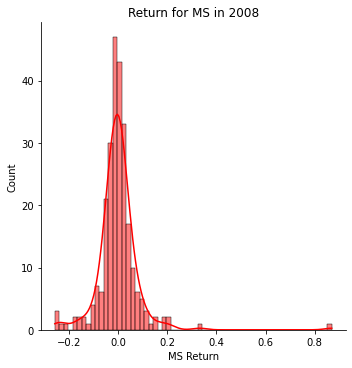

In [336]:
A3 = sns.displot(returns.loc['2008-01-01':'2008-12-31','MS'], kde = True, color='red', alpha= 0.5)
A3. set(title = 'Return for MS in 2008', xlabel = 'MS Return')

<AxesSubplot:xlabel='Date'>

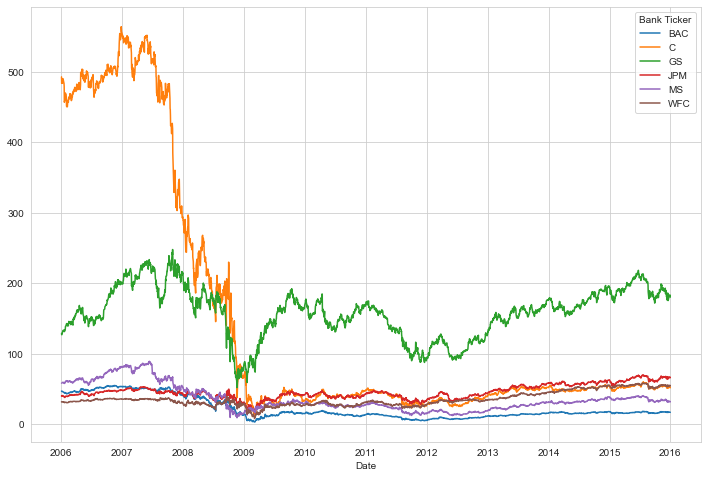

In [364]:
plt.figure (figsize=(12,8))
sns.lineplot(data = bank_stocks.xs('Close', axis = 1, level = 1),dashes=False)

In [368]:
plt.figure (figsize=(12,8))
bank_stocks.xs('Close', axis = 1, level = 1).iplot()

<Figure size 864x576 with 0 Axes>

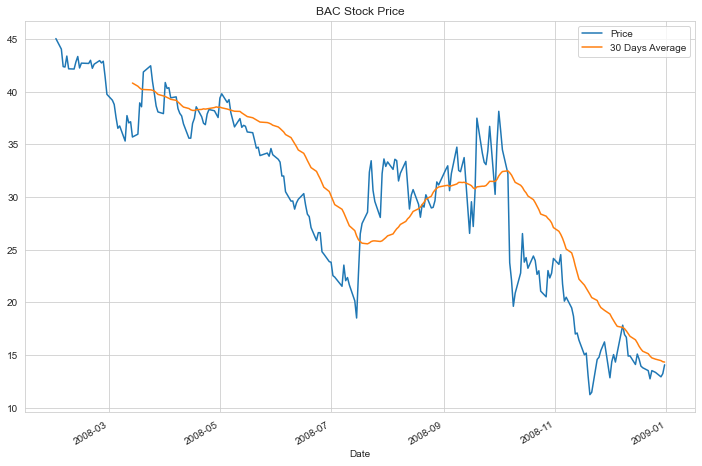

In [410]:
plt.figure(figsize=(12,8))
A1 = (bank_stocks.xs('Close', axis = 1, level = 1)['BAC'].loc['2008-02-1':'2008-12-31']).plot(label = 'Price')
A2 = (bank_stocks.xs('Close', axis = 1, level = 1)['BAC'].loc['2008-02-1':'2008-12-31'].rolling(30).mean()).plot(label = '30 Day Average')
A1. set_title('BAC Stock Price')
A1.legend(['Price','30 Days Average'])
plt.show()





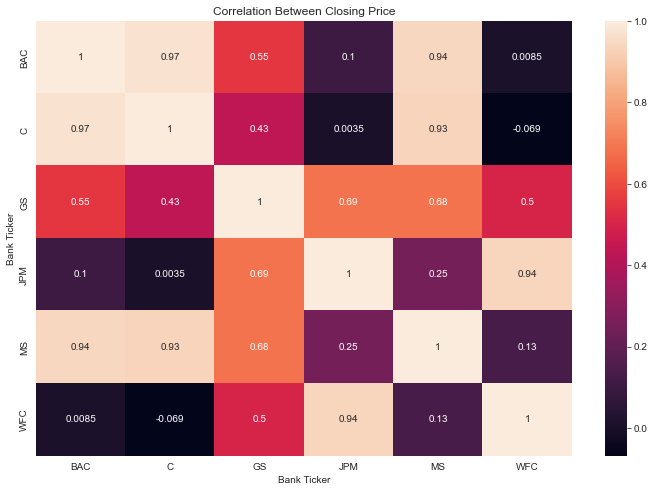

In [425]:
plt.figure(figsize=(12,8))
A1 = sns.heatmap(bank_stocks.xs('Close',level = 1,axis = 1).corr(),annot=True)
A1.set(title = 'Correlation Between Closing Price')
plt.show()



In [458]:
bank_stocks.xs('BAC',  axis = 1).loc['2015-01-01':'2016-01-01'][['Open','High','Low','Close']].iplot(kind="candle")

In [460]:
bank_stocks.xs('MS',  axis = 1).loc['2015-01-01':'2016-01-01'][['Open','High','Low','Close']].ta_plot(study='sma')

In [462]:
bank_stocks.xs('BAC',  axis = 1).loc['2015-01-01':'2016-01-01'][['Open','High','Low','Close']].ta_plot(study='boll')